In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import cm
import matplotlib
import collections
import copy

In [2]:
City = collections.namedtuple('City', 'name path_csv')

In [29]:
class DataFrameInput:
    df = None
    
    def __init__(self, city:City):
        self.city = copy.copy(city)
    
    def read_csv(self):
        self.df = pd.read_csv(self.city.path_csv, index_col=None)
        
    def make_plot_3d(self, z):
        p = plt.figure(figsize=(45, 45)).gca(projection='3d')
        p.scatter(self.df.latitude, self.df.longitude, self.df[z])
        p.set_xlabel('latitude')
        p.set_ylabel('longitude')
        p.set_zlabel(z)
        plt.show()
    
    def __copy__(self):
        obj = DataFrameInput(city=self.city)
        obj.df = copy.deepcopy(self.df)
        return obj
        
    def make_additional_time_data(self, datetime_col_name):
        obj = copy.copy(self)
        obj.df[datetime_col_name] = pd.to_datetime(obj.df[datetime_col_name])
        obj.df['day_of_week'] = obj.df[datetime_col_name].apply(lambda x: x.dayofweek)
        obj.df['month'] = obj.df[datetime_col_name].apply(lambda x: x.month)
        obj.df['dayofyear'] = obj.df[datetime_col_name].apply(lambda x: x.dayofyear)
        obj.df['hour'] = obj.df[datetime_col_name].apply(lambda x: x.hour)
        obj.df['time_per_minute'] = obj.df[datetime_col_name].apply(lambda x: x.minute) + obj.df['hour'] * 60
        return obj
    
    def drop_duplicates(self, *need_columns):
        obj = copy.copy(self)
        obj.df = self.df[list(need_columns)].drop_duplicates(keep='first')
        return obj
    
    def make_profiling_to_file(self, path):
        report = pandas_profiling.ProfileReport(self.df, html={'style':{'full_width':True}})
        report.to_file(f'{path}{self.city.name}.html')
                
    

In [30]:
cities ={'spb': City(name='spb', path_csv='./datasets/geoflickr_spb.csv'), 'prague': City(name='prague', path_csv='./datasets/geoflickr_prague.csv')}

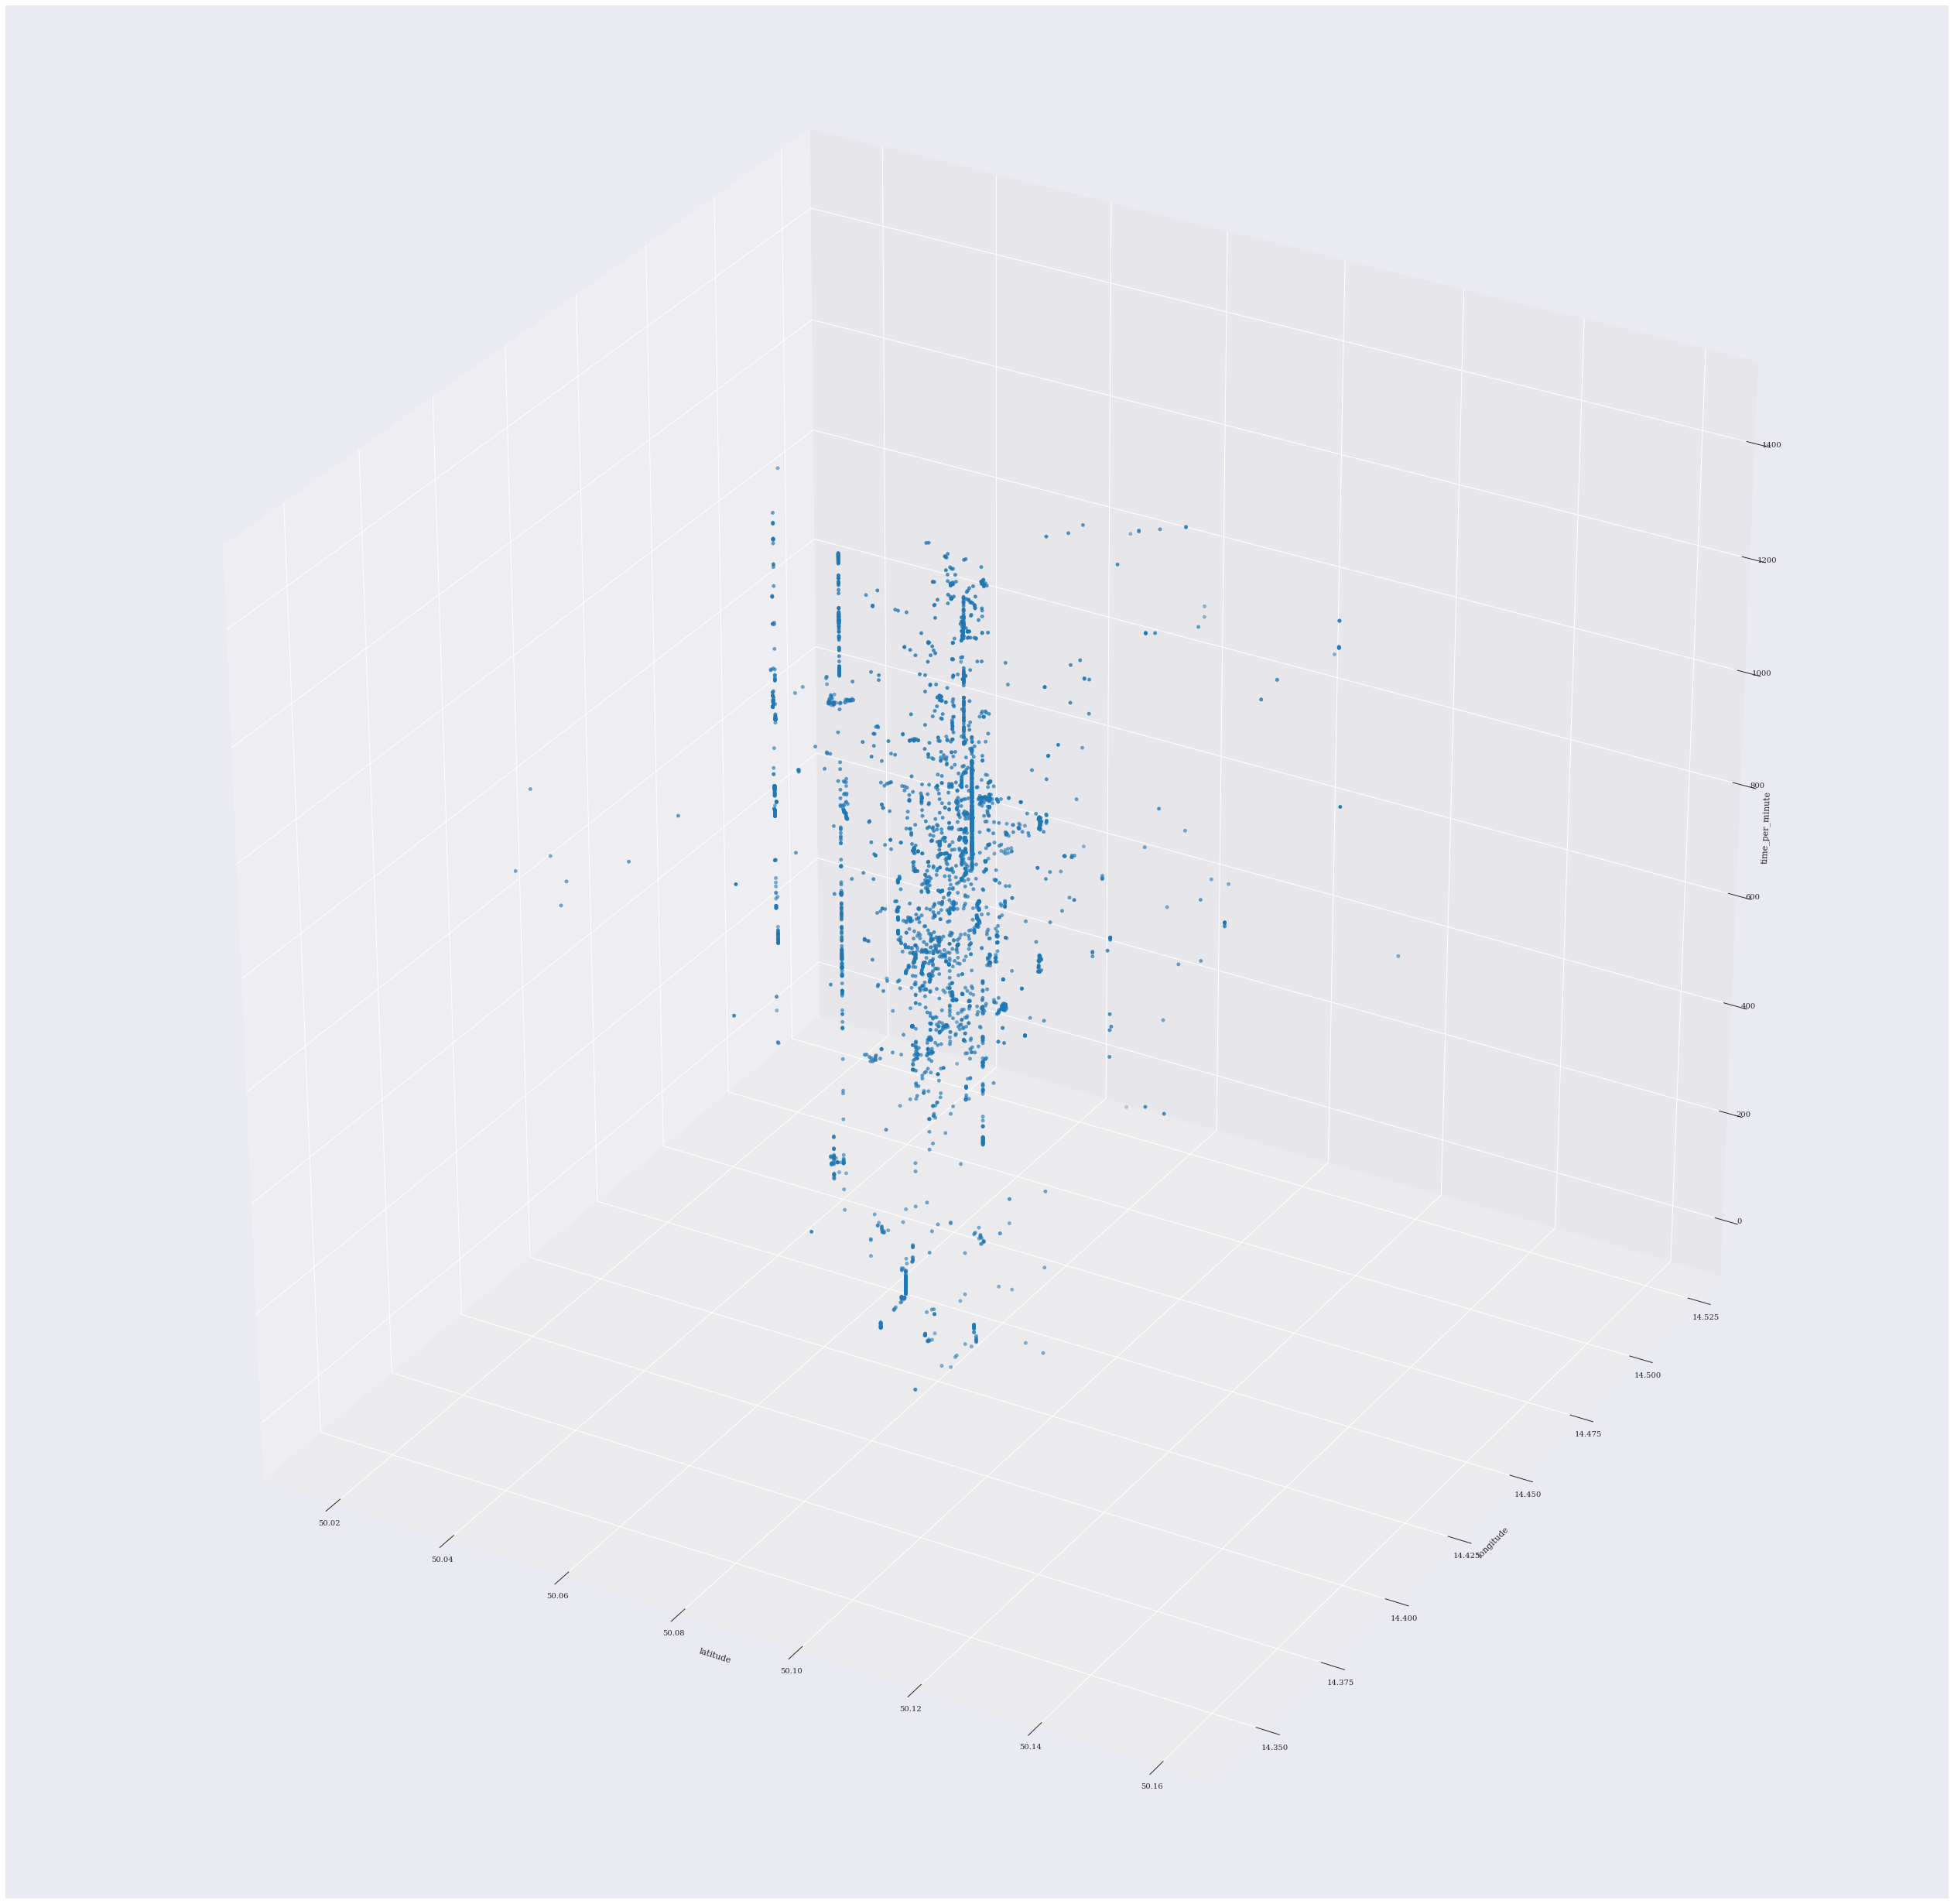

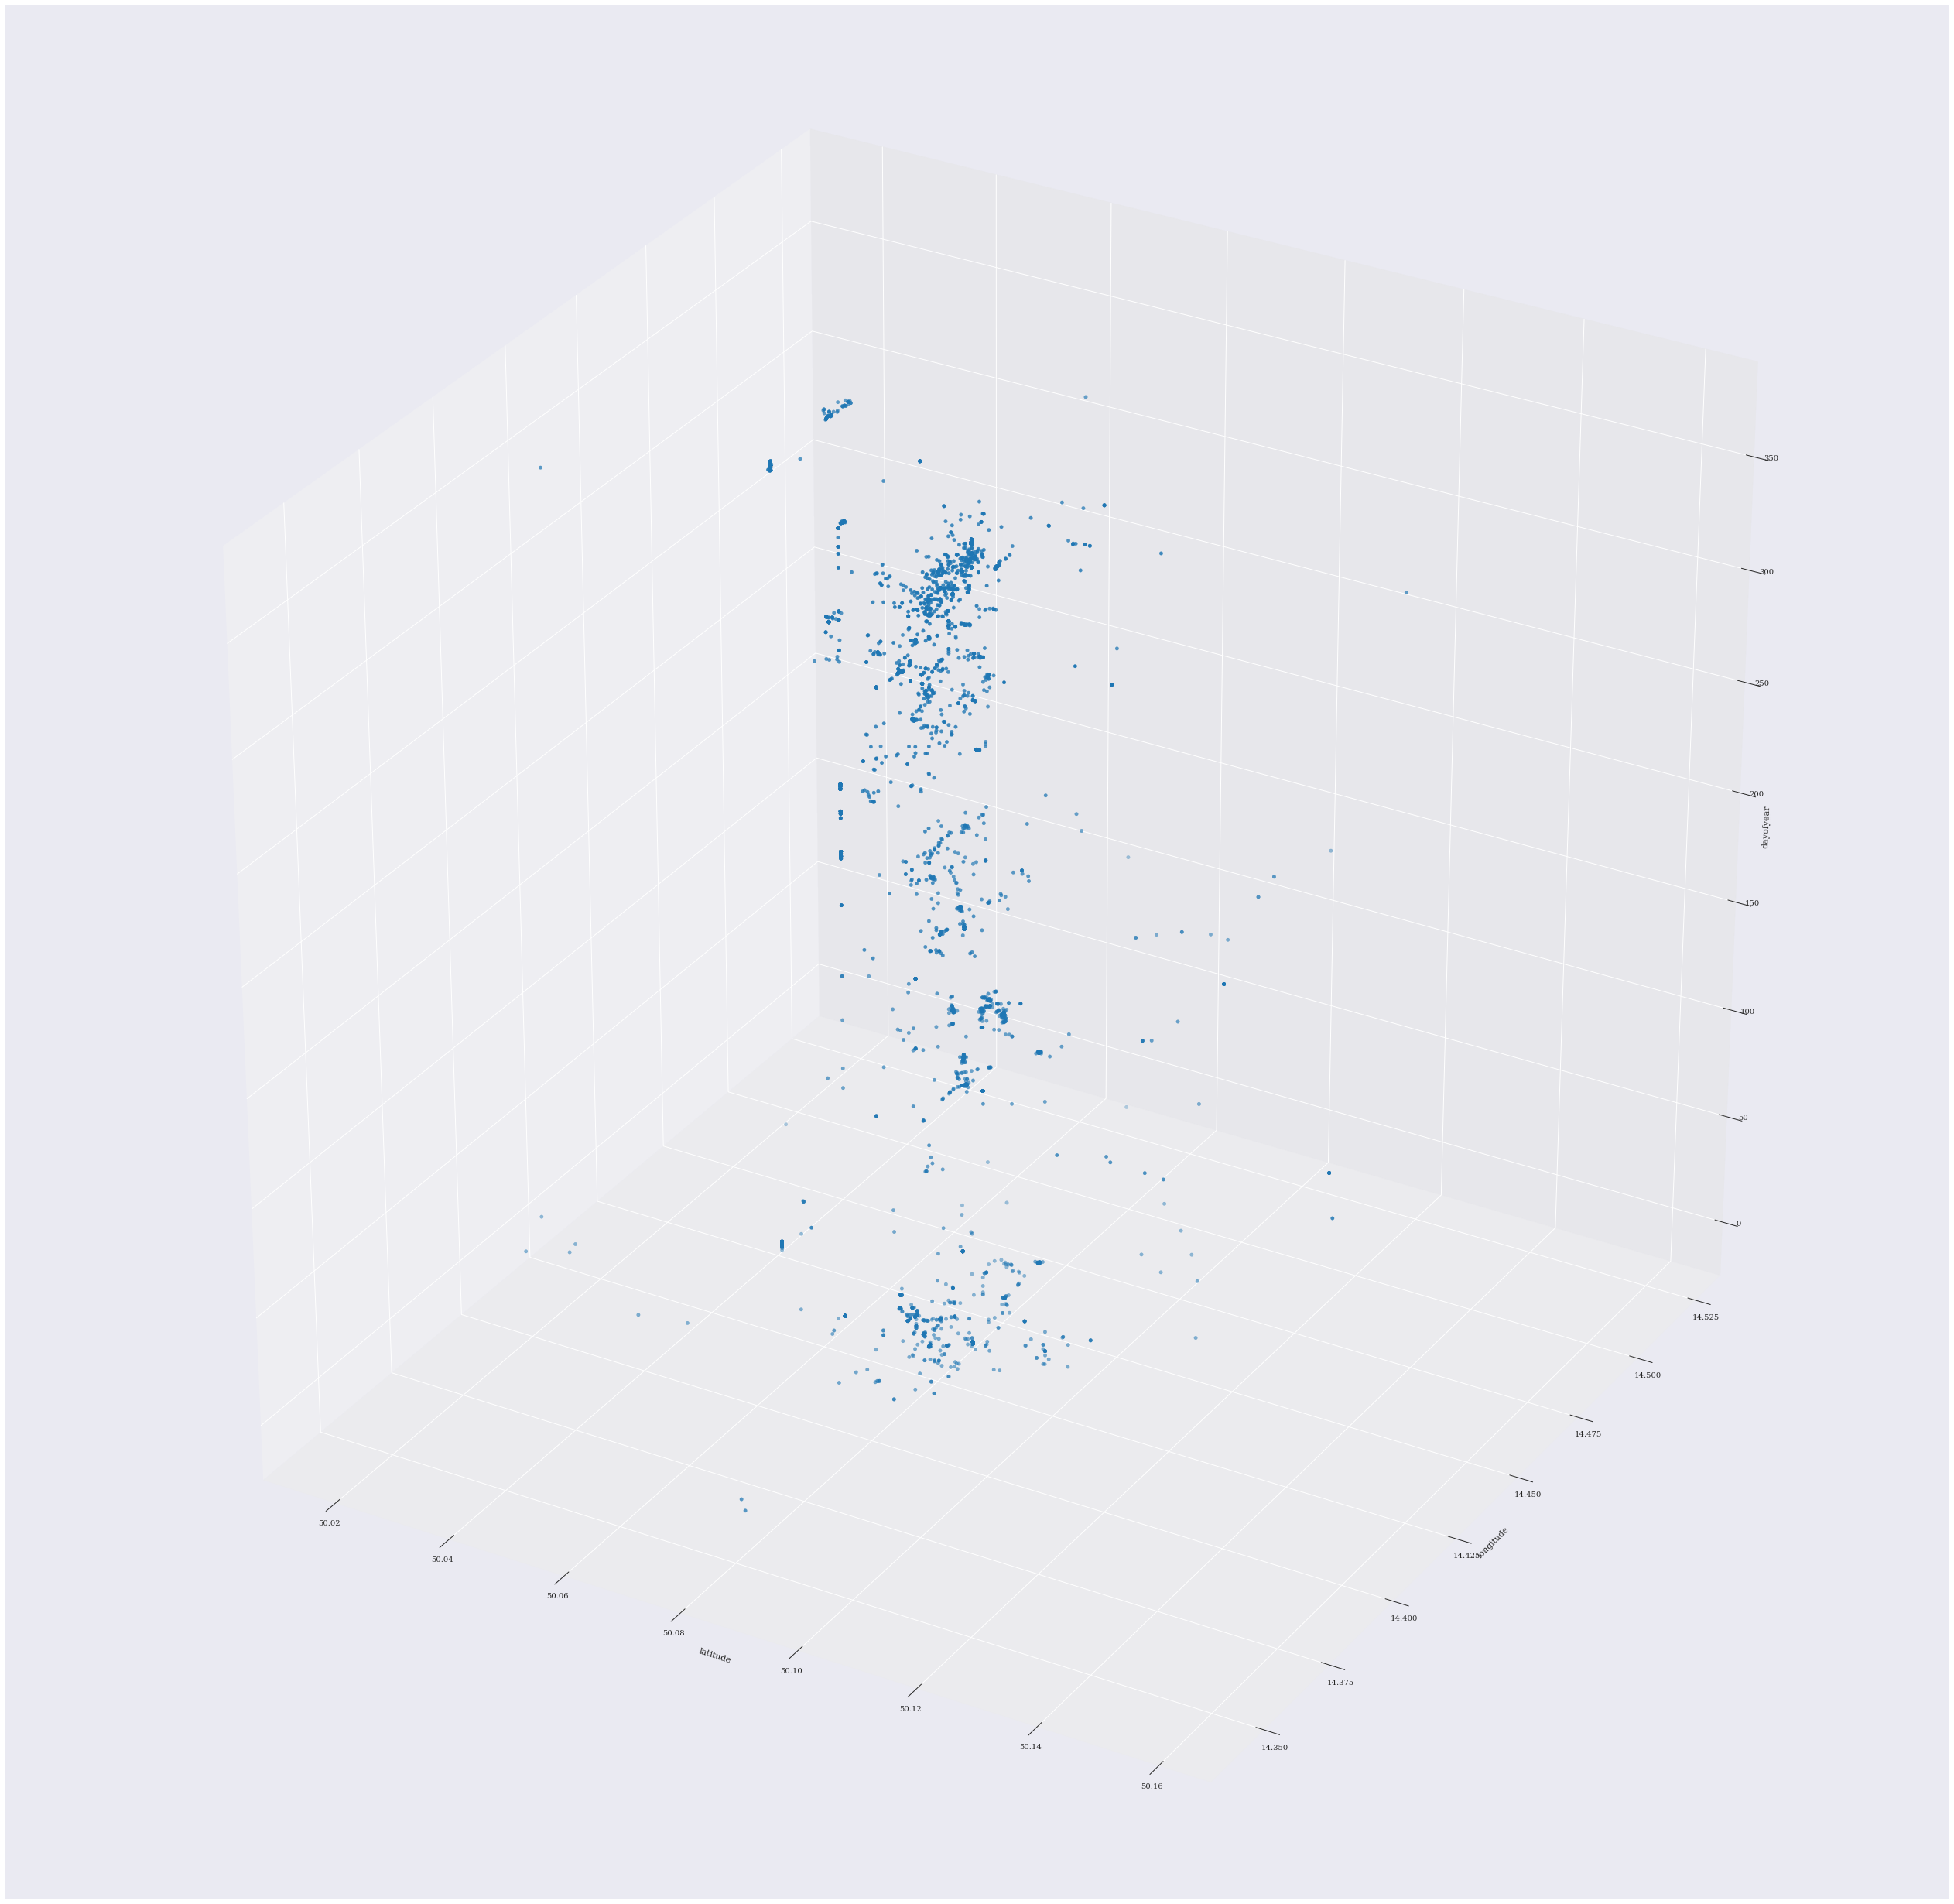

In [32]:
city_key = 'prague'
input_data_pr = DataFrameInput(cities[city_key])
input_data_pr.read_csv()
data_drop_pr = input_data_pr.drop_duplicates('latitude', 'longitude', 'datetaken', 'owner')
data_drop_pr = data_drop_pr.make_additional_time_data(datetime_col_name='datetaken')
data_drop_pr.make_plot_3d(z='time_per_minute')
data_drop_pr.make_plot_3d(z='dayofyear')
data_drop_pr.make_profiling_to_file(path='./results/profile_reports/')

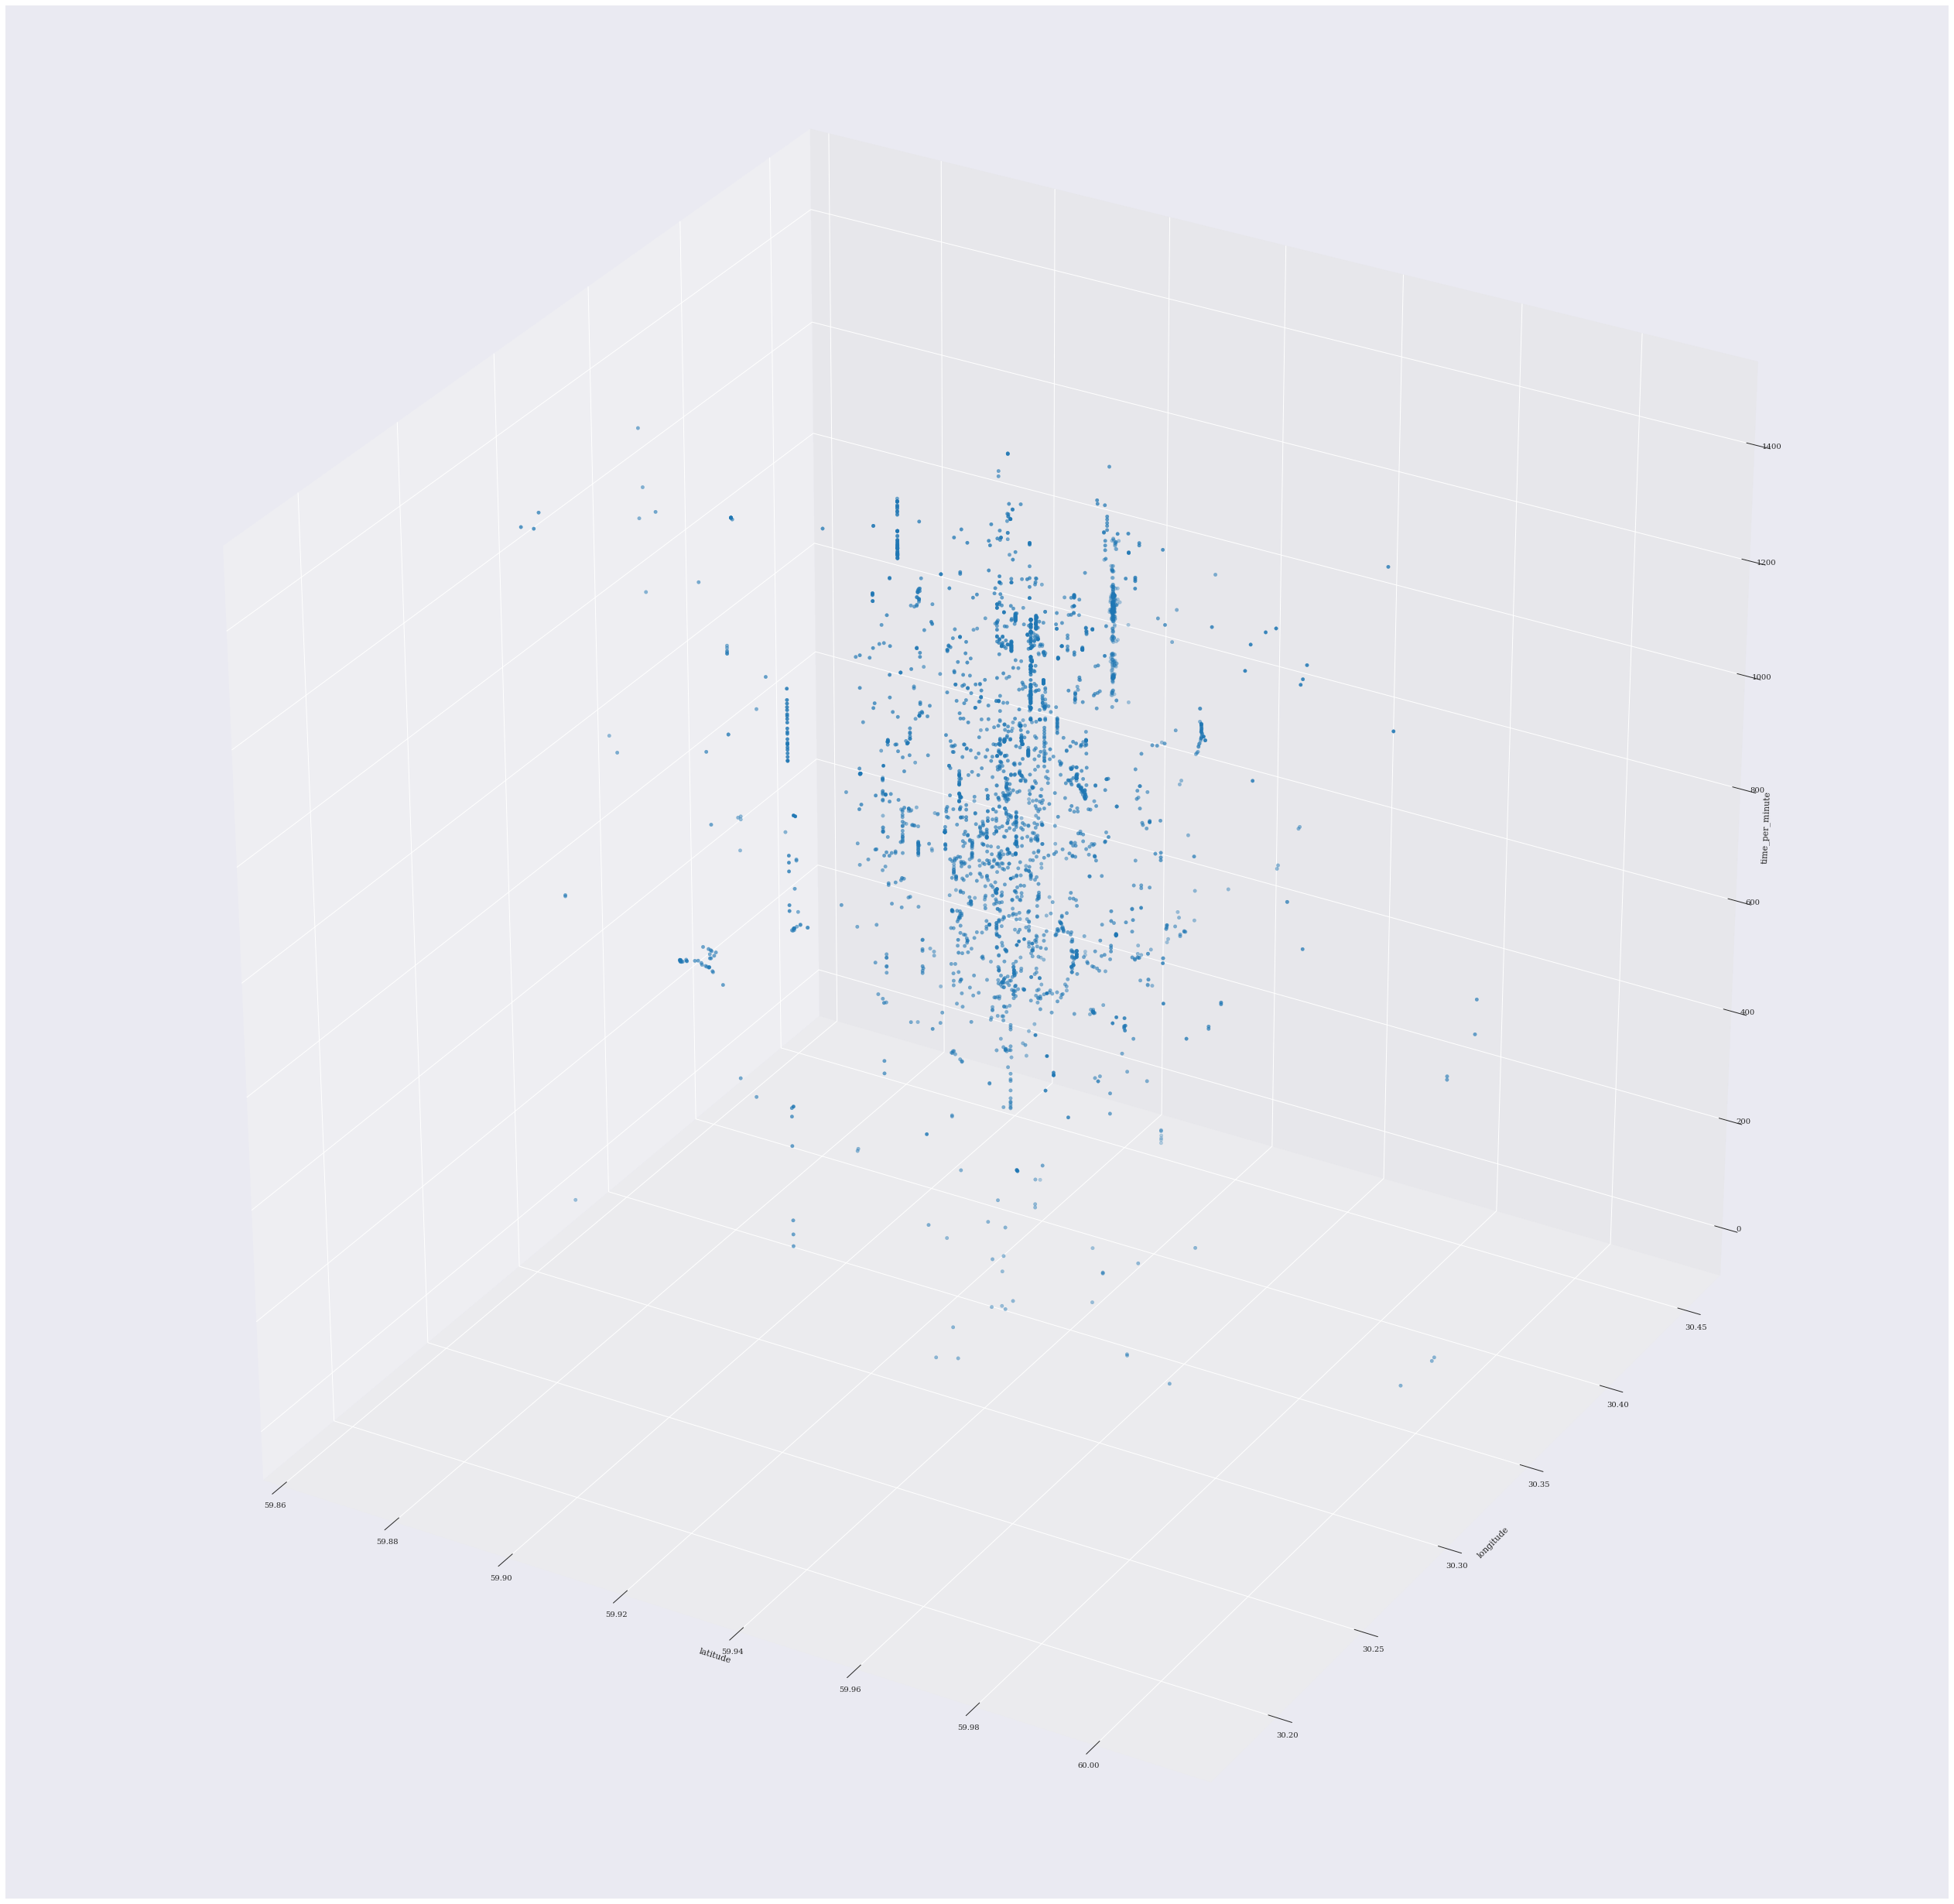

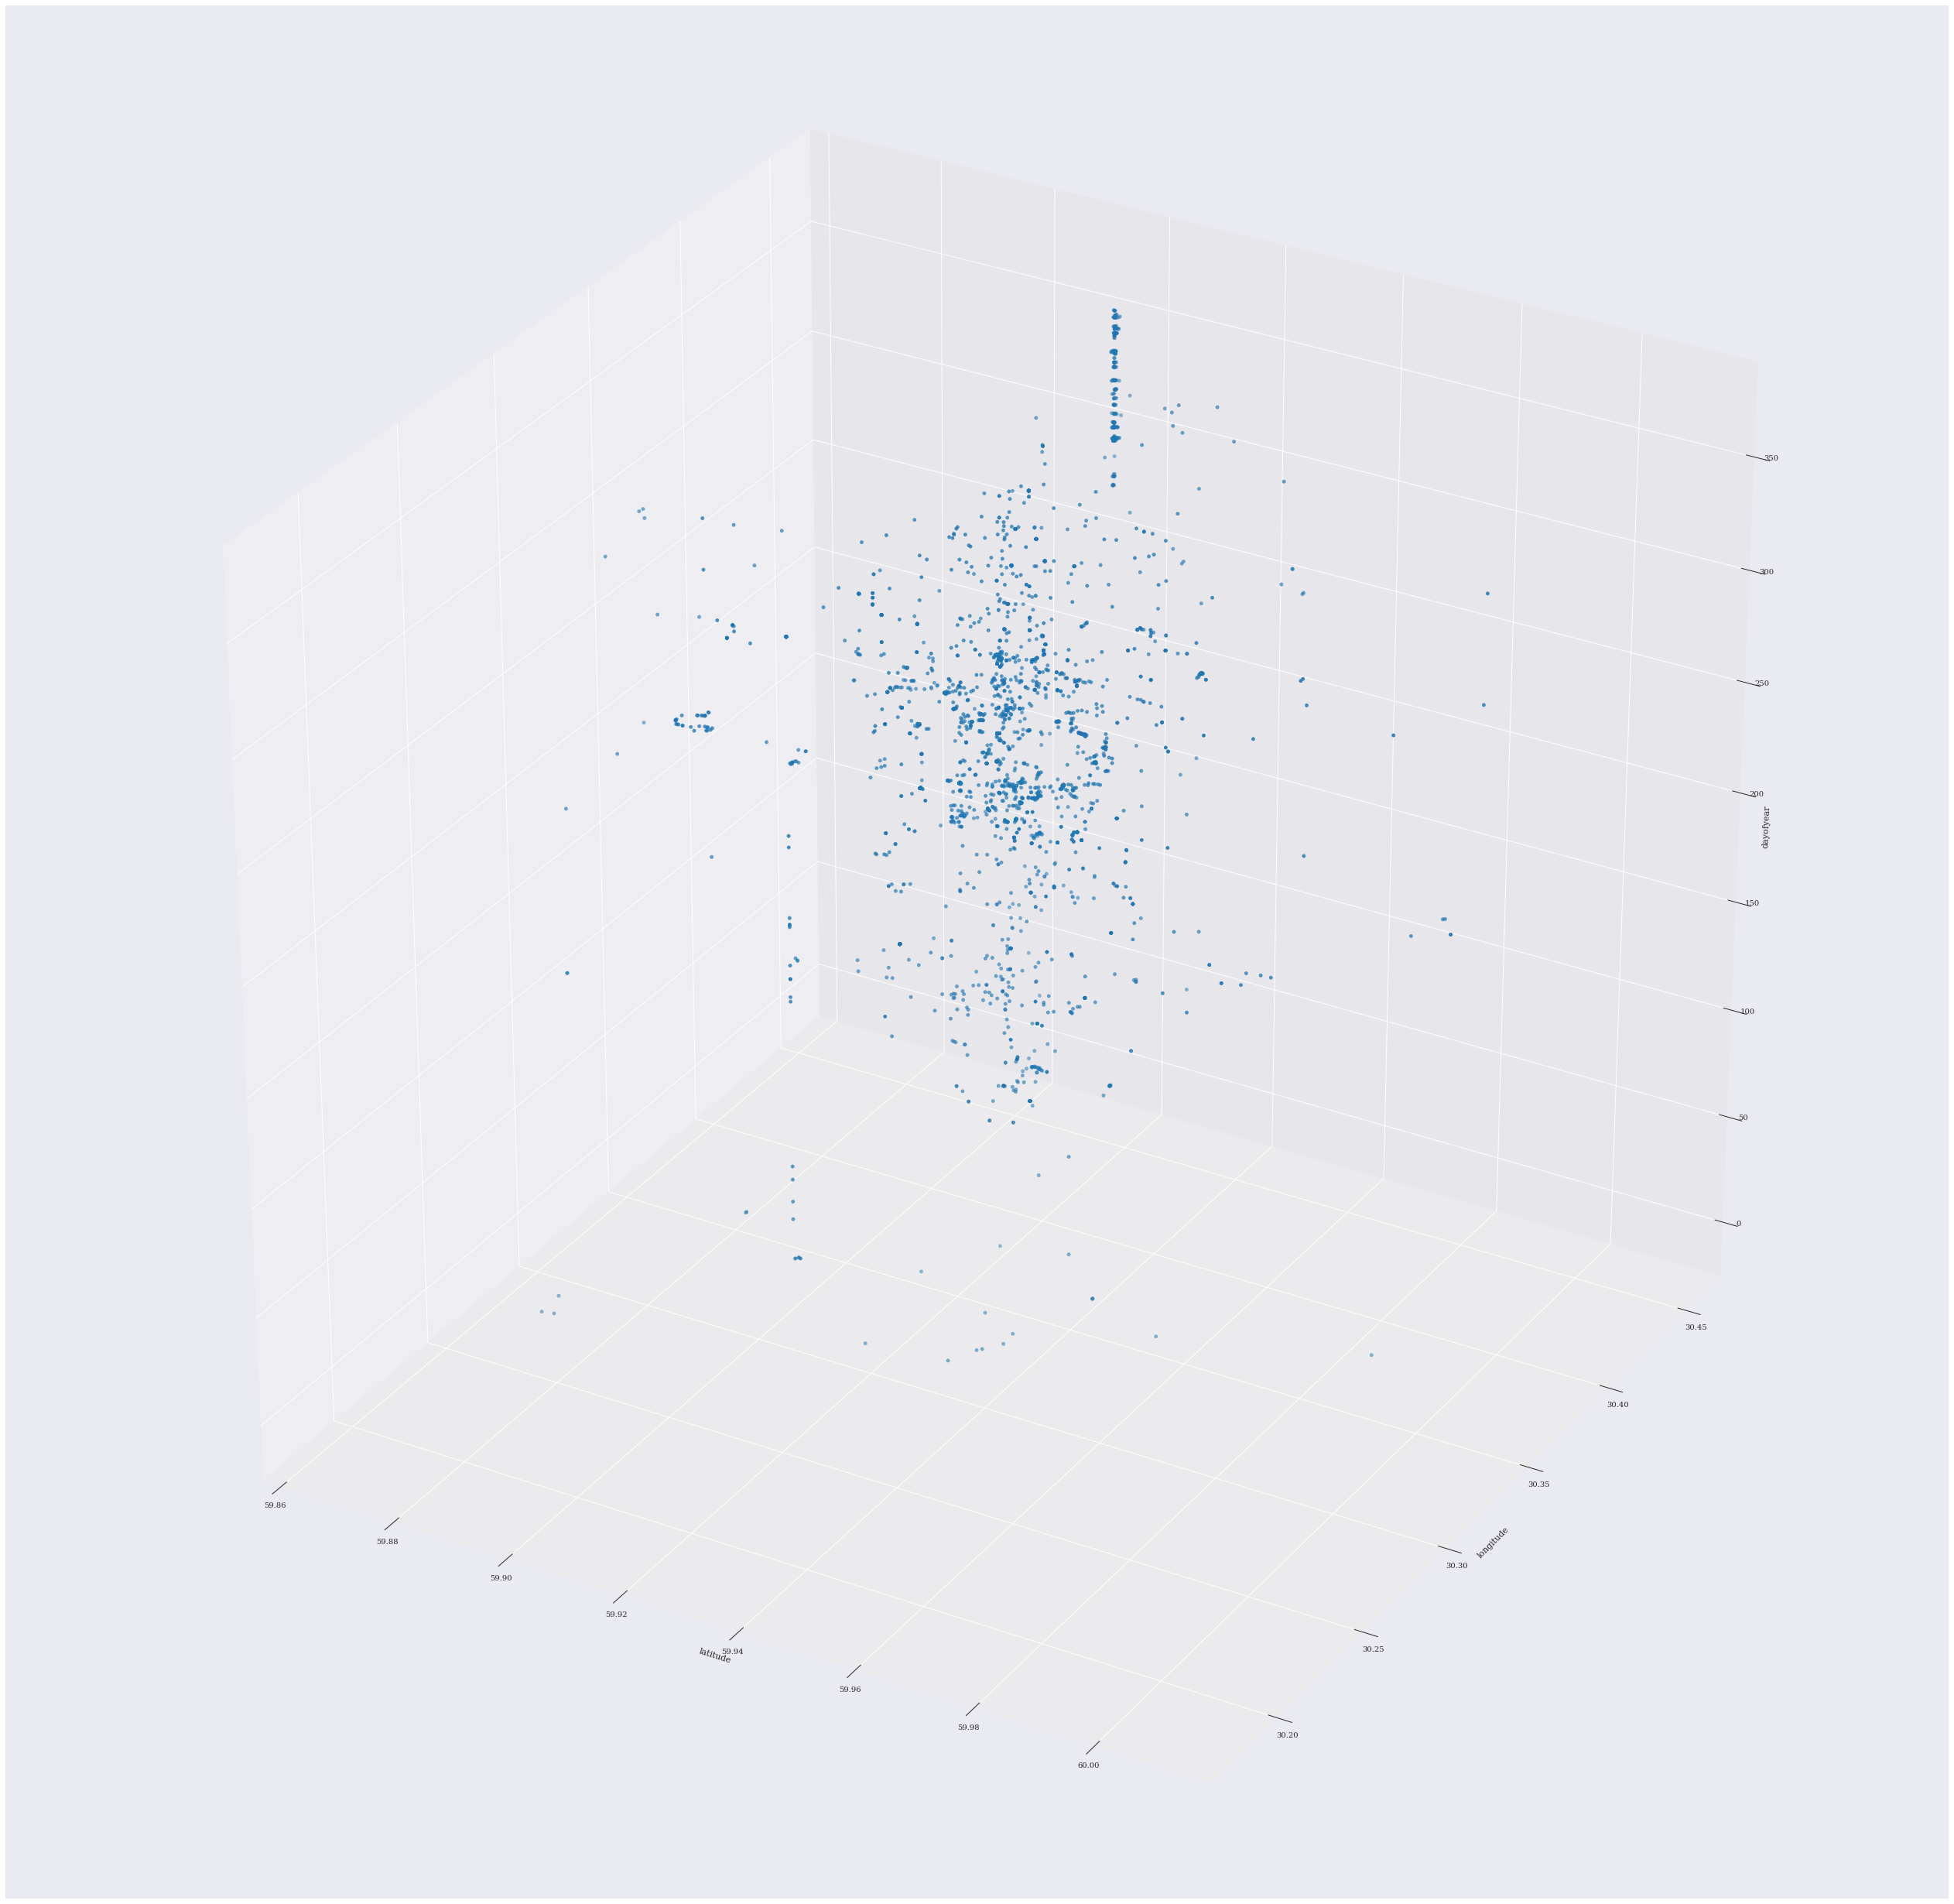

In [34]:
city_key = 'spb'
input_data_spb = DataFrameInput(cities[city_key])
input_data_spb.read_csv()
data_drop_spb = input_data_spb.drop_duplicates('latitude', 'longitude', 'datetaken', 'owner')
data_drop_spb = data_drop_spb.make_additional_time_data(datetime_col_name='datetaken')
data_drop_spb.make_plot_3d(z='time_per_minute')
data_drop_spb.make_plot_3d(z='dayofyear')
data_drop_spb.make_profiling_to_file(path='./results/profile_reports/')